In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import itertools

from graph_utils.generate_graph import generate_graph
from graph_utils.utils import pp, miia, mip, mioa, in_neighbors
from graph_utils.greedy_ic import ap

## Initial setup

In [2]:
grph = generate_graph(num_nodes_min_max=[50, 55])

/Users/hugo/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


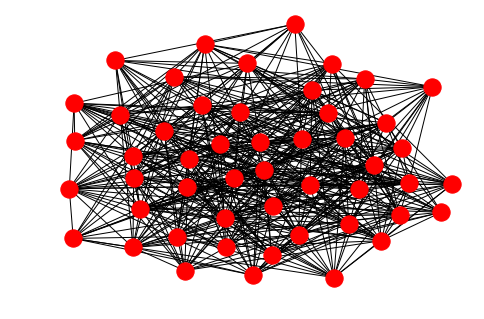

In [3]:
nx.draw(grph)

Text(0.5, 1.0, 'Histogram of transition probabilities')

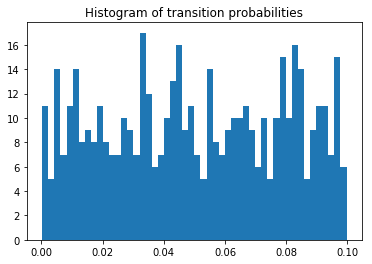

In [4]:
plt.hist([i['transition_proba'] for i in list(grph.edges.values())], bins=50)
plt.title("Histogram of transition probabilities")

Text(0.5, 1.0, 'Histogram of -log-transition probabilities')

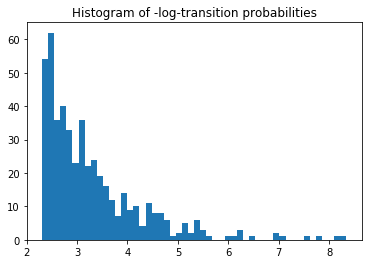

In [5]:
plt.hist([i['log_transition_proba'] for i in list(grph.edges.values())], bins=50)
plt.title("Histogram of -log-transition probabilities")

In [6]:
sum(ap(i, [1, 2, 3, 9], miia(i, 0.001, grph), grph) for i in range(grph.number_of_nodes()))

24.879880823606513

In [7]:
from tqdm import tqdm_notebook as tqdm

In [8]:
def naive_greedy_algorithm(n_source, grph):
    s = []

    for k in tqdm(range(n_source)):
        max_influence = 0
        max_node = 0
        for node in tqdm(range(grph.number_of_nodes())):
            if not node in s:
                influence = sum(ap(i, s + [node], miia(i, 0.001, grph), grph) 
                                for i in range(grph.number_of_nodes()))
                if influence > max_influence:
                    max_node = node
                    max_influence = influence
        s.append(max_node)
    
    return s

In [ ]:
s = naive_greedy_algorithm(3, grph)

In [ ]:
s